In [80]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_rows', 100)
    
root_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/'
data_path = '/home/lucas/projects/mmml-alzheimer-diagnosis/data/'

os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_training/')
from ensemble_train import prepare_mri_predictions

os.chdir('/home/lucas/projects/mmml-alzheimer-diagnosis/src/model_evaluation/')
from ensemble_evaluation import compare_ensembles_rocs_on_dataset,calculate_rocs_on_datasets,calculate_metrics_on_datasets,calculate_experiment_performance_on_datasets


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MRI Deep Learning Training Results

## MCI x CN

In [83]:
df_preds = pd.read_csv(data_path+'PREDICTIONS_MCI_VGG19_BN.csv')
imgs_coronal = df_preds.query("ORIENTATION in ('coronal')")['IMAGE_DATA_ID'].tolist()
imgs_axial = df_preds.query("ORIENTATION in ('axial')")['IMAGE_DATA_ID'].tolist()
imgs_sagittal = df_preds.query("ORIENTATION in ('sagittal')")['IMAGE_DATA_ID'].tolist()
axial_diffs = list(set(imgs_coronal) - set(imgs_axial))

other_missing_mris = ['I254766', 'I85612', 'I85589', 'I86179', 'I85699', 'I321306',
       'I82125', 'I119487', 'I223283', 'I296801', 'I148873', 'I47709',
       'I47859', 'I280596', 'I280591', 'I39736', 'I67743', 'I35815',
       'I267765', 'I63099', 'I63097', 'I63095', 'I133472', 'I312665',
       'I133486', 'I274525', 'I274523', 'I38658', 'I79913', 'I119133',
       'I236970', 'I95628', 'I200217', 'I46381', 'I293688', 'I52770']

In [91]:
df_mri = prepare_mri_predictions(data_path+'PREDICTIONS_MCI_VGG19_BN.csv').dropna()
datasets = [df_mri.query("DATASET in ('train','train_cnn')"),
            df_mri.query("DATASET == 'validation'"),
            df_mri.query("DATASET == 'test'")]
df_mri.shape

(2451, 7)

In [ ]:
for dataset in zip(['Train','Validation,'Test'],[])

ROC Curves

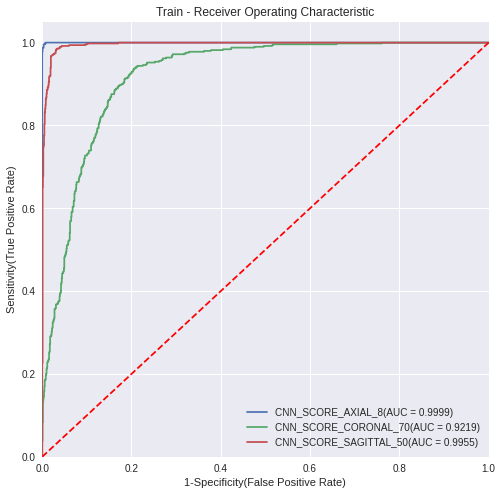

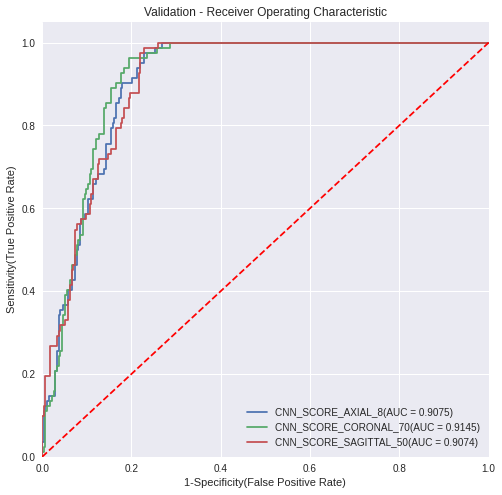

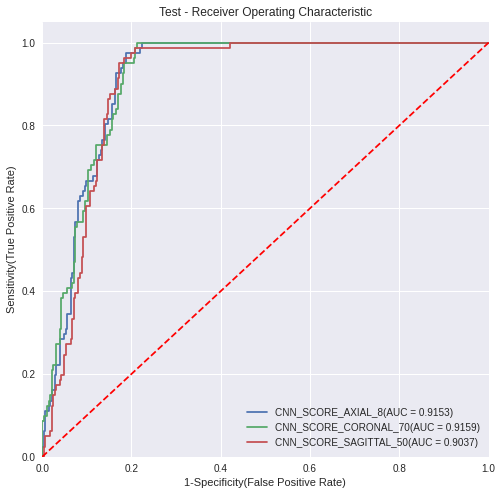


Opt thresh 6    0.322333
Name: Optimal_Thresh, dtype: float64
Opt thresh 7    0.465799
Name: Optimal_Thresh, dtype: float64
Opt thresh 8    0.265075
Name: Optimal_Thresh, dtype: float64


,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_SCORE_AXIAL_8,1.0,1.0,0.999938,0.99945,1.000426,0.000249,0.995992,0.990448,1.001536,0.996756,0.993582,0.99993,CNN_SCORE_AXIAL_8,0.597011,Train
1,CNN_SCORE_CORONAL_70,0.9519038076152304,0.7274549098196392,0.921909,0.905107,0.938711,0.008573,0.885772,0.857862,0.913681,0.837794,0.817217,0.858371,CNN_SCORE_CORONAL_70,0.472682,Train
2,CNN_SCORE_SAGITTAL_50,1.0,0.9959919839679359,0.995545,0.991409,0.999681,0.00211,0.983968,0.972948,0.994988,0.96837,0.958601,0.978139,CNN_SCORE_SAGITTAL_50,0.516961,Train
3,CNN_SCORE_AXIAL_8,0.975609756097561,0.5853658536585366,0.907531,0.863072,0.951991,0.022684,0.902439,0.838215,0.966663,0.820513,0.774989,0.866036,CNN_SCORE_AXIAL_8,0.322333,Validation
4,CNN_SCORE_CORONAL_70,0.975609756097561,0.6463414634146342,0.914545,0.871633,0.957457,0.021894,0.890244,0.822586,0.957902,0.846154,0.803354,0.888954,CNN_SCORE_CORONAL_70,0.465799,Validation
5,CNN_SCORE_SAGITTAL_50,0.9878048780487805,0.5853658536585366,0.907397,0.862909,0.951886,0.022699,0.97561,0.942221,1.008998,0.78022,0.731098,0.829342,CNN_SCORE_SAGITTAL_50,0.265075,Validation
6,CNN_SCORE_AXIAL_8,1.0,0.6666666666666666,0.915282,0.872324,0.958239,0.021918,0.925926,0.868892,0.98296,0.833922,0.790563,0.877281,CNN_SCORE_AXIAL_8,0.322333,Test
7,CNN_SCORE_CORONAL_70,1.0,0.6172839506172839,0.915892,0.873075,0.95871,0.021846,0.950617,0.903432,0.997802,0.816254,0.771133,0.861376,CNN_SCORE_CORONAL_70,0.465799,Test
8,CNN_SCORE_SAGITTAL_50,0.9876543209876543,0.6049382716049383,0.903721,0.858235,0.949207,0.023208,0.950617,0.903432,0.997802,0.826855,0.782771,0.870939,CNN_SCORE_SAGITTAL_50,0.265075,Test


In [78]:
# df_compare = pd.read_csv('/home/lucas/projects/mmml-alzheimer-diagnosis/data/PREDICTIONS_MCI_ALL_SCORES_ENSEMBLE.csv')
            
models = ['CNN_SCORE_AXIAL_8','CNN_SCORE_CORONAL_70', 'CNN_SCORE_SAGITTAL_50']
df_rocs = calculate_rocs_on_datasets(models = models,datasets=datasets,label ='MACRO_GROUP')
df_rocs

In [79]:
df_rocs

,index,SensLevel_at_0.75,SensLevel_at_0.9,AUC,AUC_CI_low,AUC_CI_high,Std_Error,Optimal_Sen,Sen_CI_low,Sen_CI_high,Optimal_Spe,Spe_CI_low,Spe_CI_high,Model,Optimal_Thresh,set
0,CNN_SCORE_AXIAL_8,1.0,1.0,0.999938,0.99945,1.000426,0.000249,0.995992,0.990448,1.001536,0.996756,0.993582,0.99993,CNN_SCORE_AXIAL_8,0.597011,Train
1,CNN_SCORE_CORONAL_70,0.9519038076152304,0.7274549098196392,0.921909,0.905107,0.938711,0.008573,0.885772,0.857862,0.913681,0.837794,0.817217,0.858371,CNN_SCORE_CORONAL_70,0.472682,Train
2,CNN_SCORE_SAGITTAL_50,1.0,0.9959919839679359,0.995545,0.991409,0.999681,0.00211,0.983968,0.972948,0.994988,0.96837,0.958601,0.978139,CNN_SCORE_SAGITTAL_50,0.516961,Train
3,CNN_SCORE_AXIAL_8,0.975609756097561,0.5853658536585366,0.907531,0.863072,0.951991,0.022684,0.902439,0.838215,0.966663,0.820513,0.774989,0.866036,CNN_SCORE_AXIAL_8,0.322333,Validation
4,CNN_SCORE_CORONAL_70,0.975609756097561,0.6463414634146342,0.914545,0.871633,0.957457,0.021894,0.890244,0.822586,0.957902,0.846154,0.803354,0.888954,CNN_SCORE_CORONAL_70,0.465799,Validation
5,CNN_SCORE_SAGITTAL_50,0.9878048780487805,0.5853658536585366,0.907397,0.862909,0.951886,0.022699,0.97561,0.942221,1.008998,0.78022,0.731098,0.829342,CNN_SCORE_SAGITTAL_50,0.265075,Validation
6,CNN_SCORE_AXIAL_8,1.0,0.6666666666666666,0.915282,0.872324,0.958239,0.021918,0.925926,0.868892,0.98296,0.833922,0.790563,0.877281,CNN_SCORE_AXIAL_8,0.322333,Test
7,CNN_SCORE_CORONAL_70,1.0,0.6172839506172839,0.915892,0.873075,0.95871,0.021846,0.950617,0.903432,0.997802,0.816254,0.771133,0.861376,CNN_SCORE_CORONAL_70,0.465799,Test
8,CNN_SCORE_SAGITTAL_50,0.9876543209876543,0.6049382716049383,0.903721,0.858235,0.949207,0.023208,0.950617,0.903432,0.997802,0.826855,0.782771,0.870939,CNN_SCORE_SAGITTAL_50,0.265075,Test


Metrics table for test set

Confusion Matrix

# Cog Tests Training Results